# Unspuervised Learning

In [55]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd

# Clustering

In [132]:
from sklearn.datasets import load_iris

In [57]:
data = load_iris()
X =data.data
y = data.target
data.target_names

array(['setosa', 'versicolor', 'virginica'], dtype='<U10')

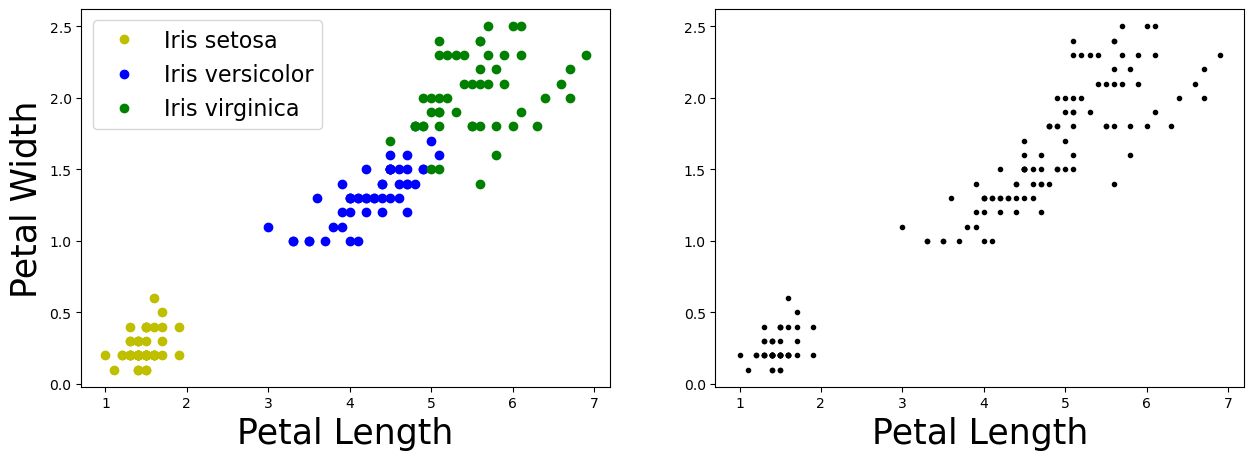

In [58]:
parameters = {'axes.labelsize': 25, 'axes.titlesize': 35}
plt.rcParams.update(parameters)

_, axes = plt.subplots(1, 2, figsize=(15, 5), dpi=100)

axes[0].plot(X[y == 0, 2], X[y == 0, 3], "yo", label="Iris setosa")
axes[0].plot(X[y == 1, 2], X[y == 1, 3], "bo", label="Iris versicolor")
axes[0].plot(X[y == 2, 2], X[y == 2, 3], "go", label="Iris virginica")

axes[0].set(xlabel="Petal Length", ylabel="Petal Width")
axes[0].legend(fontsize=16)

axes[1].scatter(X[:, 2], X[:, 3], c="k", marker=".")
axes[1].set(xlabel="Petal Length")

plt.show()

# GMM Gaussian Mixure Model
A Gaussian mixture model can actually seperate these clusters well:

(4  feats: Petal / Sepal & width / length)

In [59]:
from sklearn.mixture import GaussianMixture

In [60]:
gm = GaussianMixture(n_components=3,random_state=42)
# 3 species?

In [61]:
y_pred = gm.fit_predict(X)

Map each cluster to a class. 
 
 Instead of hard coding the mapping (as is done in the book, for simplicity), we will pick the most common class for each cluster (using the `scipy.stats.mode()` function):

In [62]:
from scipy import stats

In [63]:
np.unique(y_pred)

array([0, 1, 2])

In [64]:
mapping = {}
for class_id in np.unique(y):
    mode,_= stats.mode(y_pred[y == class_id])
    mapping[mode[0]] = class_id

mapping # ?? 

{1: 0, 2: 1, 0: 2}

In [65]:
y_pred = np.array([mapping[cluster_id] for cluster_id in y_pred])

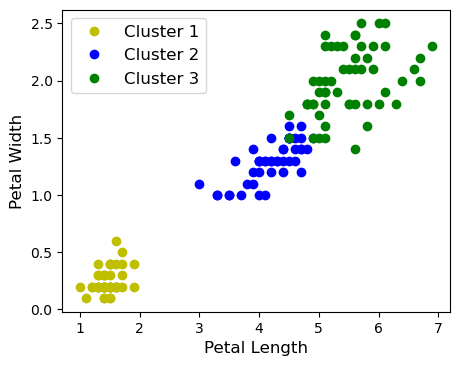

In [66]:
parameters = {'axes.labelsize': 12, 'axes.titlesize': 12}
plt.rcParams.update(parameters)

_, ax = plt.subplots(figsize=(5, 4), dpi=100)

ax.plot(X[y_pred == 0, 2], X[y_pred == 0, 3], "yo", label="Cluster 1")
ax.plot(X[y_pred == 1, 2], X[y_pred == 1, 3], "bo", label="Cluster 2")
ax.plot(X[y_pred == 2, 2], X[y_pred == 2, 3], "go", label="Cluster 3")

ax.set(xlabel="Petal Length", ylabel="Petal Width")
ax.legend(fontsize=12)

plt.show()

In [67]:
np.sum(y_pred == y) / len(y)

0.9666666666666667

 **Note**: the results in this notebook may differ slightly from the book. This is because algorithms can sometimes be tweaked a bit between Scikit-Learn versions.

# K-means

In [68]:
from sklearn.datasets import make_blobs

In [69]:
blob_centers = np.array([[0.2, 2.3], [-1.5, 2.3], [-2.8, 1.8], [-2.8, 2.8],
                         [-2.8, 1.3]])
blob_std = np.array([0.4, 0.3, 0.1, 0.1, 0.1])

In [70]:
X, y = make_blobs(n_samples=2000,
                  centers=blob_centers,
                  cluster_std=blob_std,
                  random_state=7)


In [71]:
def plot_clusters(X, y=None):
    _ ,ax = plt.subplots(figsize=(8, 4), dpi=100)
    ax.scatter(X[:,0],X[:,1],c=y,s=1)
    ax.set(xlabel='$x_1$',ylabel='$x_2$')

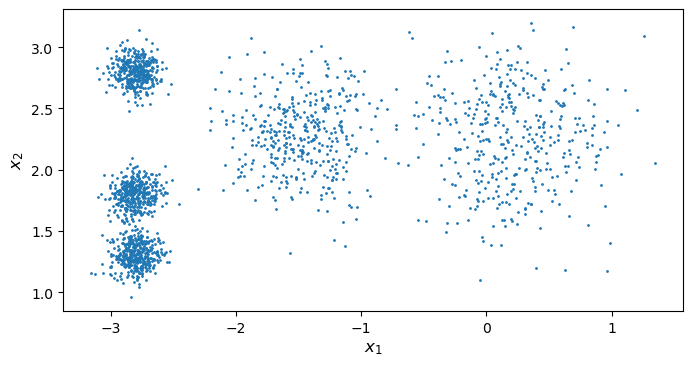

In [72]:
 parameters = {'axes.labelsize': 12, 'axes.titlesize': 12}
plt.rcParams.update(parameters)


plot_clusters(X)
plt.show()

## Fit and predict

Train a K-means cluster on this dataset

In [73]:
from sklearn.cluster import KMeans

In [74]:
k = 5 # later

In [75]:
kmeans = KMeans(n_clusters=k, random_state=42)

In [76]:
y_pred = kmeans.fit_predict(X)

Each instance was assigned to onee of the five clusters.

In [77]:
y_pred

array([4, 0, 1, ..., 2, 1, 0], dtype=int32)

In [78]:
y_pred == kmeans.labels_

array([ True,  True,  True, ...,  True,  True,  True])

In [79]:
y_pred is kmeans.labels_

True

In [80]:
# find the cluster centers
kmeans.cluster_centers_

array([[-2.80389616,  1.80117999],
       [ 0.20876306,  2.25551336],
       [-2.79290307,  2.79641063],
       [-1.46679593,  2.28585348],
       [-2.80037642,  1.30082566]])

In [81]:
# try some prediction:
X_new = np.array([[0, 2], [3, 2], [-3, 3], [-3, 2.5]])
kmeans.predict(X_new)

array([1, 1, 2, 2], dtype=int32)

## Decision Boundaries

In [82]:
def plot_data(X):
    plt.plot(X[:, 0], X[:, 1], 'k.', markersize=2)


def plot_centroids(centroids, weights=None, circle_color='w', cross_color='k'):
    if weights is not None:
        centroids = centroids[weights > weights.max() / 10]
    plt.scatter(centroids[:, 0],
                centroids[:, 1],
                marker='o',
                s=35,
                linewidth=8,
                color=circle_color,
                zorder=10,
                alpha=0.9)
    plt.scatter(centroids[:, 0],
                centroids[:, 1],
                marker='x',
                s=2,
                linewidth=12,
                color=cross_color,
                zorder=11,
                alpha=1)


def plot_decision_boundaries(clusterer,
                             X,
                             resolution=1000,
                             show_centroids=True,
                             show_xlabels=True,
                             show_ylabels=True):
    mins = X.min(axis=0) - 0.1
    maxs = X.max(axis=0) + 0.1
    xx, yy = np.meshgrid(np.linspace(mins[0], maxs[0], resolution),
                         np.linspace(mins[1], maxs[1], resolution))
    Z = clusterer.predict(np.c_[xx.ravel(), yy.ravel()])
    Z = Z.reshape(xx.shape)

    plt.contourf(Z,
                 extent=(mins[0], maxs[0], mins[1], maxs[1]),
                 cmap="Pastel2")
    plt.contour(Z,
                extent=(mins[0], maxs[0], mins[1], maxs[1]),
                linewidth=1,
                colors='k')
    plot_data(X)
    if show_centroids:
        plot_centroids(clusterer.cluster_centers_)

    if show_xlabels:
        plt.xlabel("$x_1$", fontsize=14)
    else:
        plt.tick_params(labelbottom=False)
    if show_ylabels:
        plt.ylabel("$x_2$", fontsize=14, rotation=0)
    else:
        plt.tick_params(labelleft=False)



/var/folders/bz/8yf5rf0s1yzd3gl6nw6xvclw0000gn/T/ipykernel_2455/684092502.py:42: UserWarning: The following kwargs were not used by contour: 'linewidth'
  plt.contour(Z,


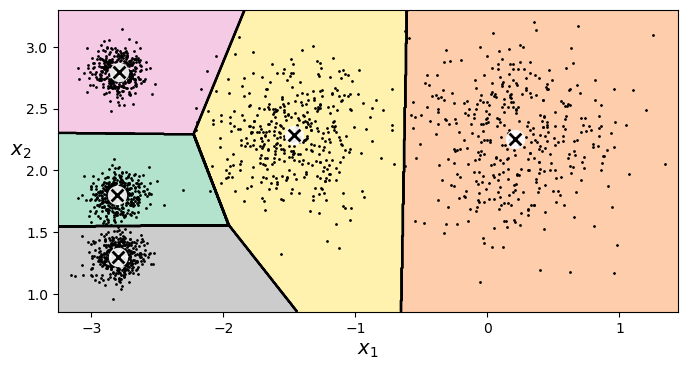

In [83]:
plt.figure(figsize=(8, 4), dpi=100)
plot_decision_boundaries(kmeans, X,resolution=1000)
plt.show()

### Hard Clustering _vs_ Soft Clustering

 Rather than arbitrarily choosing the closest cluster for each instance, which is called _hard clustering_, it might be better measure the distance of each instance to all 5 centroids. This is what the `transform()` method does:


In [84]:
kmeans.transform(X_new)

array([[2.81093633, 0.32995317, 2.9042344 , 1.49439034, 2.88633901],
       [5.80730058, 2.80290755, 5.84739223, 4.4759332 , 5.84236351],
       [1.21475352, 3.29399768, 0.29040966, 1.69136631, 1.71086031],
       [0.72581411, 3.21806371, 0.36159148, 1.54808703, 1.21567622]])

 You can verify that this is indeed the Euclidian distance between each instance and each centroid:

In [85]:
np.linalg.norm(np.tile(X_new,
                       (1, k)).reshape(-1, k, 2) - kmeans.cluster_centers_,
               axis=2)


array([[2.81093633, 0.32995317, 2.9042344 , 1.49439034, 2.88633901],
       [5.80730058, 2.80290755, 5.84739223, 4.4759332 , 5.84236351],
       [1.21475352, 3.29399768, 0.29040966, 1.69136631, 1.71086031],
       [0.72581411, 3.21806371, 0.36159148, 1.54808703, 1.21567622]])

## K-Means Algorithm

 The K-Means algorithm is one of the fastest clustering algorithms, and also one of the simplest:
 * First initialize $k$ centroids randomly: $k$ distinct instances are chosen randomly from the dataset and the centroids are placed at their locations.
 * Repeat until convergence (i.e., until the centroids stop moving):
     * Assign each instance to the closest centroid.
     * Update the centroids to be the mean of the instances that are assigned to them.


The `KMeans` class applies an optimized algorithm by default. To get the original K-Means algorithm (for educational purposes only), you must set `init="random"`, `n_init=1`and `algorithm="full"`. These hyperparameters will be explained below.

Let's run the K-Means algorithm for 1, 2 and 3 iterations, to see how the centroids move around:

In [86]:
kmeans_iter_1 = KMeans(n_clusters=5,
                       init="random",
                       n_init=1,
                       algorithm="full",
                       max_iter=1,
                       random_state=0)
kmeans_iter_2 = KMeans(n_clusters=5,
                       init="random",
                       n_init=1,
                       algorithm="full",
                       max_iter=2,
                       random_state=0)
kmeans_iter_3 = KMeans(n_clusters=5,
                       init="random",
                       n_init=1,
                       algorithm="full",
                       max_iter=3,
                       random_state=0)
kmeans_iter_1.fit(X)
kmeans_iter_2.fit(X)
kmeans_iter_3.fit(X)

KMeans(algorithm='full', init='random', max_iter=3, n_clusters=5, n_init=1,
       random_state=0)

/var/folders/bz/8yf5rf0s1yzd3gl6nw6xvclw0000gn/T/ipykernel_2455/684092502.py:42: UserWarning: The following kwargs were not used by contour: 'linewidth'
  plt.contour(Z,
/var/folders/bz/8yf5rf0s1yzd3gl6nw6xvclw0000gn/T/ipykernel_2455/684092502.py:42: UserWarning: The following kwargs were not used by contour: 'linewidth'
  plt.contour(Z,
/var/folders/bz/8yf5rf0s1yzd3gl6nw6xvclw0000gn/T/ipykernel_2455/684092502.py:42: UserWarning: The following kwargs were not used by contour: 'linewidth'
  plt.contour(Z,
/var/folders/bz/8yf5rf0s1yzd3gl6nw6xvclw0000gn/T/ipykernel_2455/684092502.py:42: UserWarning: The following kwargs were not used by contour: 'linewidth'
  plt.contour(Z,
/var/folders/bz/8yf5rf0s1yzd3gl6nw6xvclw0000gn/T/ipykernel_2455/684092502.py:42: UserWarning: The following kwargs were not used by contour: 'linewidth'
  plt.contour(Z,


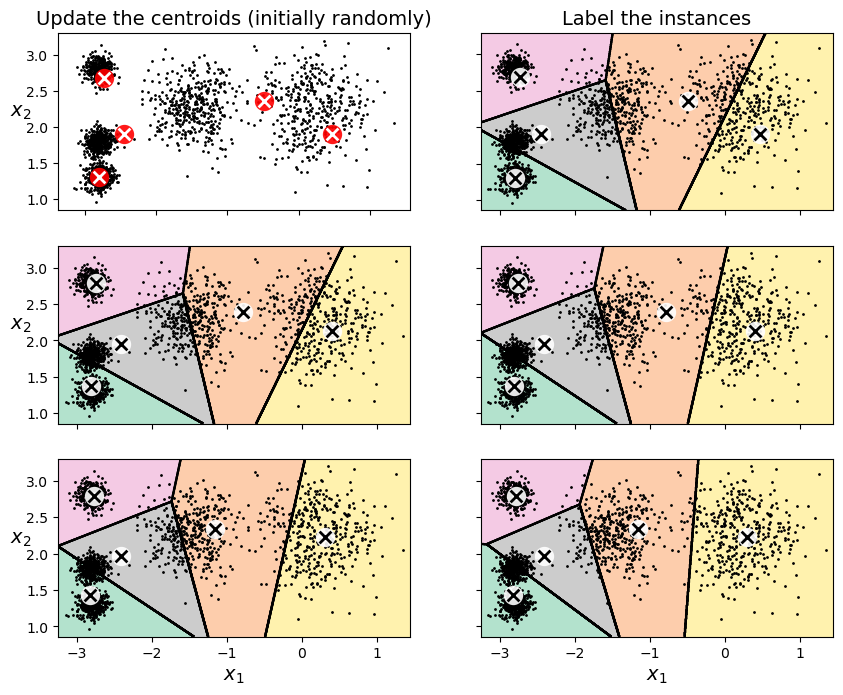

In [87]:
plt.figure(figsize=(10, 8), dpi=100)

plt.subplot(321)
plot_data(X)
plot_centroids(kmeans_iter_1.cluster_centers_,
               circle_color='r',
               cross_color='w')
plt.ylabel("$x_2$", fontsize=14, rotation=0)
plt.tick_params(labelbottom=False)
plt.title("Update the centroids (initially randomly)", fontsize=14)

plt.subplot(322)
plot_decision_boundaries(kmeans_iter_1,
                         X,
                         resolution=1000,
                         show_xlabels=False,
                         show_ylabels=False)
plt.title("Label the instances",fontsize=14)

plt.subplot(323)
plot_decision_boundaries(kmeans_iter_1,
                         X,
                         resolution=1000,
                         show_xlabels=False,
                         show_centroids=False)
plot_centroids(kmeans_iter_2.cluster_centers_,)

plt.subplot(324)
plot_decision_boundaries(kmeans_iter_2,X,show_xlabels=False,show_ylabels=False)

plt.subplot(325)
plot_decision_boundaries(kmeans_iter_2,X,show_centroids=False)
plot_centroids(kmeans_iter_3.cluster_centers_)

plt.subplot(326)
plot_decision_boundaries(kmeans_iter_3,X,show_ylabels=False)

plt.show()


## K-means Variability

 In the original K-Means algorithm, the centroids are just initialized randomly, and the algorithm simply runs a single iteration to gradually improve the centroids, as we saw above.

 However, one major problem with this approach is that if you run K-Means multiple times (or with different random seeds), it can converge to very different solutions, as you can see below:

In [88]:
def plot_clusterer_comparison(clusterer1,
                              clusterer2,
                              X,
                              title1=None,
                              title2=None):
    clusterer1.fit(X)
    clusterer2.fit(X)

    plt.figure(figsize=(10, 3.2))

    plt.subplot(121)
    plot_decision_boundaries(clusterer1, X)
    if title1:
        plt.title(title1, fontsize=14)

    plt.subplot(122)
    plot_decision_boundaries(clusterer2, X, show_ylabels=False)
    if title2:
        plt.title(title2, fontsize=14)


/var/folders/bz/8yf5rf0s1yzd3gl6nw6xvclw0000gn/T/ipykernel_2455/684092502.py:42: UserWarning: The following kwargs were not used by contour: 'linewidth'
  plt.contour(Z,
/var/folders/bz/8yf5rf0s1yzd3gl6nw6xvclw0000gn/T/ipykernel_2455/684092502.py:42: UserWarning: The following kwargs were not used by contour: 'linewidth'
  plt.contour(Z,


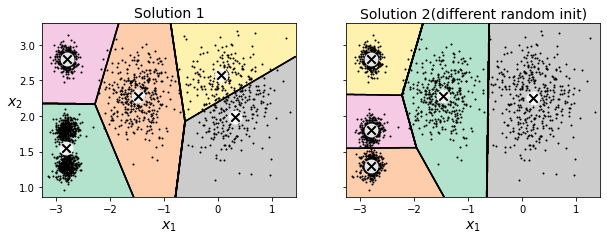

In [89]:
kmeans_rnd_init_1 = KMeans(n_clusters=5,
                          init="random",
                          n_init=1,
                          algorithm="full",
                          random_state=2)
kmeans_rnd_init_2 = KMeans(n_clusters=5,
                          init="random",
                          n_init=1,
                          algorithm="full",
                          random_state=5)

plot_clusterer_comparison(kmeans_rnd_init_1,
                     kmeans_rnd_init_2,
                     X,
                    "Solution 1",
                    "Solution 2(different random init)")

plt.show()

### Inertia

 To select the best model, we will need a way to evaluate a K-Mean model's performance. Unfortunately, clustering is an unsupervised task, so we do not have the targets. But at least we can measure the distance between each instance and its centroid. This is the idea behind the _inertia_ metric:


In [90]:
kmeans.inertia_

211.59853725816836

 As you can easily verify, inertia is the sum of the squared distances between each training instance and its closest centroid:

In [91]:
X_dist = kmeans.transform(X)
np.sum(X_dist[np.arange(X_dist.shape[0]), kmeans.labels_]**2)
# np.sum(X_dist[np.arange(len(X_dist)), kmeans.labels_]**2)

211.59853725816805

 The `score()` method returns the negative inertia. Why negative? Well, it is because a predictor's `score()` method must always respect the "_greater is better_" rule.

In [92]:
kmeans.score(X)

-211.59853725816836

### Multiple Initializations

 So one approach to solve the variability issue is to simply run the K-Means algorithm multiple times with different random initializations, and select the solution that minimizes the inertia. For example, here are the inertias of the two "bad" models shown in the previous figure:

In [93]:
kmeans_rnd_init_1.inertia_,kmeans_rnd_init_2.inertia_

(219.43539442771402, 211.5985372581684)

 As you can see, they have a higher inertia than the first "good" model we trained, which means they are probably worse.

  When you set the `n_init` hyperparameter, Scikit-Learn runs the original algorithm `n_init` times, and selects the solution that minimizes the inertia. By default, Scikit-Learn sets `n_init=10`.

In [94]:
kmeans_rnd_init_10 = KMeans(n_clusters=5,init="random",n_init=10,algorithm="full",random_state=42)
kmeans_rnd_init_10.fit(X)

KMeans(algorithm='full', init='random', n_clusters=5, random_state=42)

 As you can see, we end up with the initial model, which is certainly the optimal K-Means solution (at least in terms of inertia, and assuming $k=5$).

/var/folders/bz/8yf5rf0s1yzd3gl6nw6xvclw0000gn/T/ipykernel_2455/684092502.py:42: UserWarning: The following kwargs were not used by contour: 'linewidth'
  plt.contour(Z,


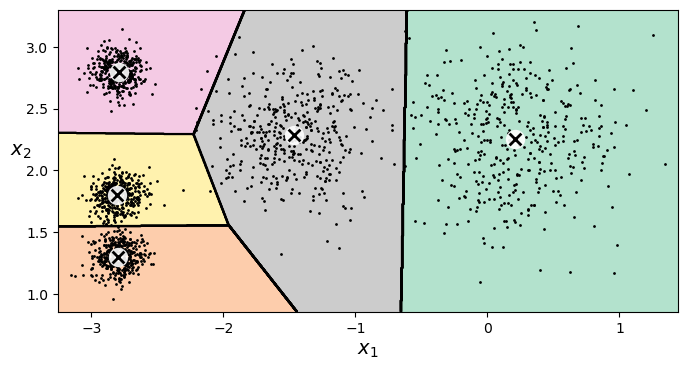

In [95]:
plt.figure(figsize=(8,4),dpi=100)

plot_decision_boundaries(kmeans_rnd_init_10,X)

plt.show()

 ### K-means++

 Instead of initializing the centroids entirely randomly, it is preferable to initialize them using the following algorithm, proposed in a [2006 paper](https://goo.gl/eNUPw6) by David Arthur and Sergei Vassilvitskii:
 * Take one centroid $c_1$, chosen uniformly at random from the dataset.
 * Take a new center $c_i$, choosing an instance $\mathbf{x}_i$ with probability: $D(\mathbf{x}_i)^2$ / $∑\limits_{j=1}^{m}{D(\mathbf{x}_j)}^2$ where $D(\mathbf{x}_i)$ is the distance between the instance $\mathbf{x}_i$ and the closest centroid that was already chosen. This probability distribution ensures that instances that are further away from already chosen centroids are much more likely be selected as centroids.
 * Repeat the previous step until all $k$ centroids have been chosen.

  The rest of the K-Means++ algorithm is just regular K-Means. With this initialization, the K-Means algorithm is much less likely to converge to a suboptimal solution, so it is possible to reduce `n_init` considerably. Most of the time, this largely compensates for the additional complexity of the initialization process.

   To set the initialization to K-Means++, simply set `init="k-means++"` (this is actually the default):

In [96]:
KMeans()

KMeans()

In [97]:
good_init = np.array([[-3, 3], [-3, 2], [-3, 1], [-1, 2], [0, 2]])

kmeans = KMeans(n_clusters=5, init=good_init, n_init=1, random_state=42)

kmeans.fit(X)

kmeans.inertia_

211.59853725816836

### Accelerated K-means

 The K-Means algorithm can be significantly accelerated by avoiding many unnecessary distance calculations: this is achieved by exploiting the triangle inequality (given three points A, B and C, the distance AC is always such that AC ≤ AB + BC) and by keeping track of lower and upper bounds for distances between instances and centroids (see this [2003 paper](https://www.aaai.org/Papers/ICML/2003/ICML03-022.pdf) by Charles Elkan for more details).

  To use Elkan's variant of K-Means, just set `algorithm="elkan"`. Note that it does not support sparse data, so by default, Scikit-Learn uses `"elkan"` for dense data, and `"full"` (the regular K-Means algorithm) for sparse data.

In [99]:
# get_ipython().run_line_magic(
#     'timeit', '-n 50 KMeans(algorithm="elkan", random_state=42).fit(X)')

In [100]:
# get_ipython().run_line_magic(
#     'timeit', '-n 50 KMeans(algorithm="full", random_state=42).fit(X)')

### Mini-Batch K-Means

 Scikit-Learn also implements a variant of the K-Means algorithm that supports mini-batches (see [this paper](http://www.eecs.tufts.edu/~dsculley/papers/fastkmeans.pdf)):

In [101]:
from sklearn.cluster import MiniBatchKMeans

In [102]:
minibatches_kmeans = MiniBatchKMeans(n_clusters=5,random_state=42)
minibatches_kmeans.fit(X)

MiniBatchKMeans(n_clusters=5, random_state=42)

In [103]:
minibatches_kmeans.inertia_

211.652398504332

 If the dataset does not fit in memory, the simplest option is to use the `memmap` class, just like we did for incremental PCA in the previous chapter. First let's load MNIST:

In [104]:
X = pd.read_feather('../data/mnist_784_X.feather')
y = pd.read_feather('../data/mnist_784_y.feather')
y = y.astype(np.int32)

## mnist_784_X/y.feather not suitable for this code

In [105]:
from sklearn.model_selection import train_test_split

In [106]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [107]:
filename = "my_mnist.data"
X_mm = np.memmap(filename, dtype='float32', mode='write', shape=X_train.shape)
X_mm[:] = X_train


In [108]:
minibatch_kmeans = MiniBatchKMeans(n_clusters=10,
                                   batch_size=10,
                                   random_state=42)
minibatch_kmeans.fit(X_mm)

MiniBatchKMeans(batch_size=10, n_clusters=10, random_state=42)

 If your data is so large that you cannot use `memmap`, things get more complicated. Let's start by writing a function to load the next batch (in real life, you would load the data from disk):

In [109]:
def load_next_batch(batch_size):
    return X[np.random.choice(len(X), batch_size, replace=False)]


 Now we can train the model by feeding it one batch at a time. We also need to implement multiple initializations and keep the model with the lowest inertia:

In [110]:
np.random.seed(42)


In [111]:
k = 5
n_init = 10
n_iterations = 100
batch_size = 100
init_size = 500  # more data for K-Means++ initialization
evaluate_on_last_n_iters = 10

best_kmeans = None

In [112]:
# for init in range(n_init):
#     minibatch_kmeans = MiniBatchKMeans(n_clusters=k, init_size=init_size)
#     X_init = load_next_batch(init_size)
#     minibatch_kmeans.partial_fit(X_init)

#     minibatch_kmeans.sum_inertia_ = 0
#     for iteration in range(n_iterations):
#         X_batch = load_next_batch(batch_size)
#         minibatch_kmeans.partial_fit(X_batch)
#         if iteration >= n_iterations - evaluate_on_last_n_iters:
#             minibatch_kmeans.sum_inertia_ += minibatch_kmeans.inertia_

#     if (best_kmeans is None
#             or minibatch_kmeans.sum_inertia_ < best_kmeans.sum_inertia_):
#         best_kmeans = minibatch_kmeans

In [113]:
# from timeit import timeit
## ！take care slow

In [114]:
# times = np.empty((100, 2))
# inertias = np.empty((100, 2))
# for k in range(1, 101):
#     kmeans_ = KMeans(n_clusters=k, random_state=42)
#     minibatch_kmeans = MiniBatchKMeans(n_clusters=k, random_state=42)
#     print("\r{}/{}".format(k, 100), end="")
#     times[k - 1, 0] = timeit("kmeans_.fit(X)", number=10, globals=globals())
#     times[k - 1, 1] = timeit("minibatch_kmeans.fit(X)",
#                              number=10,
#                              globals=globals())
#     inertias[k - 1, 0] = kmeans_.inertia_
#     inertias[k - 1, 1] = minibatch_kmeans.inertia_

In [115]:
# plt.figure(figsize=(10, 4))

# plt.subplot(121)
# plt.plot(range(1, 101), inertias[:, 0], "r--", label="K-Means")
# plt.plot(range(1, 101), inertias[:, 1], "b.-", label="Mini-batch K-Means")
# plt.xlabel("$k$", fontsize=16)
# plt.title("Inertia", fontsize=14)
# plt.legend(fontsize=14)
# plt.axis([1, 100, 0, 100])

# plt.subplot(122)
# plt.plot(range(1, 101), times[:, 0], "r--", label="K-Means")
# plt.plot(range(1, 101), times[:, 1], "b.-", label="Mini-batch K-Means")
# plt.xlabel("$k$", fontsize=16)
# plt.title("Training time (seconds)", fontsize=14)
# plt.axis([1, 100, 0, 6])

# plt.show()


In [116]:
# X = pd.read_feather('../data/mnist_784_X.feather')
# y = pd.read_feather('../data/mnist_784_y.feather')
# y = y.astype(np.int32)

In [117]:
# kmeans_k3 = KMeans(n_clusters=3, random_state=42)
# kmeans_k8 = KMeans(n_clusters=8, random_state=42)

# plot_clusterer_comparison(kmeans_k3, kmeans_k8, X, "$k=3$", "$k=8$")
# plt.show()


In [118]:
X = pd.read_feather('../data/mnist_784_X.feather')
y = pd.read_feather('../data/mnist_784_y.feather')
y = y.astype(np.int32)

In [119]:
X_train, X_test, y_train, y_test = train_test_split(X,
                                                    y,
                                                    test_size=0.2,
                                                    random_state=42)


In [120]:
from sklearn.cluster import MiniBatchKMeans


In [121]:

n_digits = len(np.unique(y_test))
print(n_digits)

# Initialize KMeans model

kmeans = MiniBatchKMeans(n_clusters=n_digits)

# Fit the model to the training data

kmeans.fit(X)

kmeans.labels_

10


array([5, 2, 0, ..., 3, 4, 8], dtype=int32)

In [122]:
kmeans.score(X)

-180986263059.6848

In [123]:
from sklearn.metrics import silhouette_score


In [124]:
silhouette_score(X, kmeans.labels_)

0.053314615033142

In [125]:
# silhouette_scores = [
#     silhouette_score(X, model.labels_) for model in kmeans_per_k[1:]
# ]


NameError: name 'kmeans_per_k' is not defined

In [126]:
# plt.figure(figsize=(8, 3))
# plt.plot(range(2, 10), silhouette_scores, "bo-")
# plt.xlabel("$k$", fontsize=14)
# plt.ylabel("Silhouette score", fontsize=14)
# plt.axis([1.8, 8.5, 0.55, 0.7])
# plt.show()


NameError: name 'silhouette_scores' is not defined

<Figure size 576x216 with 0 Axes>

In [ ]:
##  to be continued

### Limits of K-means

In [130]:
X_1,y_1 = make_blobs(n_samples=1000,centers=((4,-4),(0,0)),random_state=42)
X_1 = X_1.dot(np.array([[0.374, 0.95], [0.732, 0.598]]))

X_2, y_2 = make_blobs(n_samples=1000, centers=1, random_state=42)
X_2 = X_2 + [6, -8]
X = np.r_[X_1, X_2]
y = np.r_[y_1, y_2]

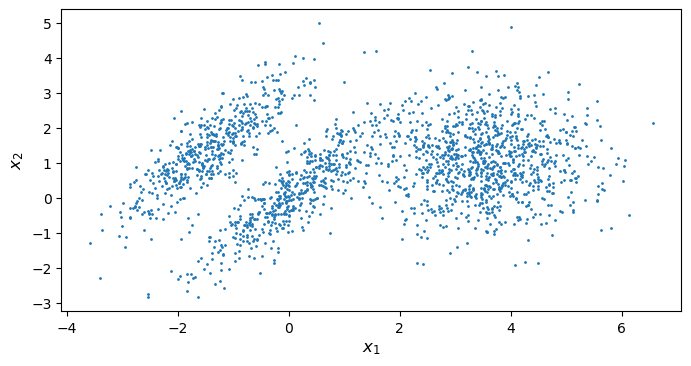

In [131]:
plot_clusters(X)

In [133]:
kmeans_good = KMeans(n_clusters=3,
                     init=np.array([[-1.5, 2.5], [0.5, 0], [4, 0]]),
                     n_init=1,
                     random_state=42)

kmeans_bad =KMeans(n_clusters=3,random_state=42)

kmeans_good.fit(X)
kmeans_bad.fit(X)

KMeans(n_clusters=3, random_state=42)

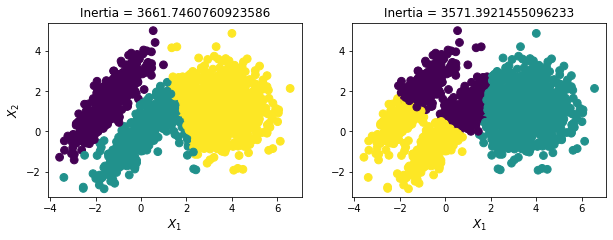

In [138]:
_, axes = plt.subplots(1, 2, figsize=(10, 3.2))

axes[0].scatter(X[:, 0], X[:, 1], c=kmeans_good.labels_, s=60)
axes[0].set(title = f"Inertia = {kmeans_good.inertia_}",ylabel="$X_2$",xlabel="$X_1$")

axes[1].scatter(X[:, 0], X[:, 1], c=kmeans_bad.labels_, s=60)
axes[1].set(title=f"Inertia = {kmeans_bad.inertia_}",
            xlabel="$X_1$")
plt.show()

/var/folders/bz/8yf5rf0s1yzd3gl6nw6xvclw0000gn/T/ipykernel_2455/684092502.py:42: UserWarning: The following kwargs were not used by contour: 'linewidth'
  plt.contour(Z,
/var/folders/bz/8yf5rf0s1yzd3gl6nw6xvclw0000gn/T/ipykernel_2455/684092502.py:42: UserWarning: The following kwargs were not used by contour: 'linewidth'
  plt.contour(Z,


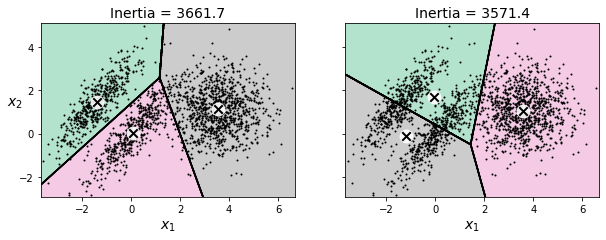

In [136]:
plt.figure(figsize=(10, 3.2))

plt.subplot(121)
plot_decision_boundaries(kmeans_good, X)
plt.title("Inertia = {:.1f}".format(kmeans_good.inertia_), fontsize=14)

plt.subplot(122)
plot_decision_boundaries(kmeans_bad, X, show_ylabels=False)
plt.title("Inertia = {:.1f}".format(kmeans_bad.inertia_), fontsize=14)

plt.show()

## Clustering applications
### Clustering for image segmentation

In [140]:
from matplotlib.image import imread

In [142]:
image = imread('./img/ladybug.png')
image.shape

(533, 800, 3)

In [144]:
X=image.reshape(-1,3)

In [147]:
X.shape

(426400, 3)

In [149]:
kmeansF = KMeans(n_clusters=8, random_state=42).fit(X)

In [150]:
segmented_img = kmeansF.cluster_centers_[kmeansF.labels_]
segmented_img = segmented_img.reshape(image.shape)

In [157]:
segmented_imgs = []
n_colors = (10,8,6,4,2)

for n_clusters in n_colors:
    kmeans = KMeans(n_clusters=n_clusters, random_state=42).fit(X)
    segmented_img = kmeans.cluster_centers_[kmeans.labels_]
    segmented_imgs.append(segmented_img.reshape(image.shape))

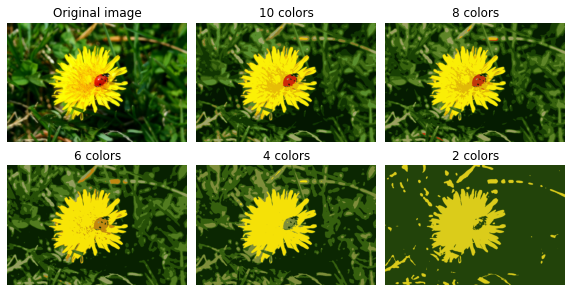

In [158]:
plt.figure(figsize=(10, 5))
plt.subplots_adjust(wspace=0.05, hspace=0.1)

plt.subplot(231)
plt.imshow(image)
plt.title("Original image")
plt.axis('off')

for idx, n_clusters in enumerate(n_colors):
    plt.subplot(232 + idx)
    plt.imshow(segmented_imgs[idx])
    plt.title("{} colors".format(n_clusters))
    plt.axis('off')

plt.show()

### Clustering for preprocessing

 Let's tackle the _digits dataset_ which is a simple MNIST-like dataset containing 1,797 grayscale 8×8 images representing digits 0 to 9.

In [160]:
from sklearn.datasets import load_digits

In [161]:
X_digits, y_digits = load_digits(return_X_y=True)

In [162]:
X_train, X_test, y_train, y_test = train_test_split(X_digits,y_digits,random_state=42)

In [163]:
from sklearn.linear_model import LogisticRegression

In [165]:
log_reg = LogisticRegression(multi_class="ovr",solver="lbfgs",max_iter=5000,random_state=42)
log_reg.fit(X_train,y_train)

LogisticRegression(max_iter=5000, multi_class='ovr', random_state=42)

In [168]:
log_reg_score = log_reg.score(X_test,y_test)
log_reg_score

0.9688888888888889

 Okay, that's our baseline: 96.89% accuracy. **Let's see if we can do better by using K-Means as a preprocessing step**. We will create a pipeline that will first cluster the training set into 50 clusters and replace the images with their distances to the 50 clusters, then apply a logistic regression model:

In [167]:
from sklearn.pipeline  import Pipeline

In [169]:
pipeline = Pipeline([
    ("kmeans",KMeans(n_clusters=50,random_state=42)),
    ("log_reg",LogisticRegression(multi_class="ovr",solver="lbfgs",max_iter=5000,random_state=42))
])
pipeline.fit(X_train,y_train)



Pipeline(steps=[('kmeans', KMeans(n_clusters=50, random_state=42)),
                ('log_reg',
                 LogisticRegression(max_iter=5000, multi_class='ovr',
                                    random_state=42))])

In [170]:
pipeline_score = pipeline.score(X_test,y_test)
pipeline_score

0.9777777777777777

In [174]:
#  How much did the error rate drop?
error_drop = round((1 - (1 - pipeline_score) / (1 - log_reg_score)),4) * 100
print(f"The error rate dorps {error_drop} %")

The error rate dorps 28.57 %


- We reduced the error rate by over 28%.
 
 -  But we chose the number of clusters $k$ completely arbitrarily, we can surely do better.
 -  Since K-Means is just a preprocessing step in a classification pipeline, finding a good value for $k$ is much simpler than earlier: there's no need to perform silhouette analysis or minimize the inertia, the best value of $k$ is simply the one that results in the best classification performance.